In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [225]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [226]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [227]:
df.shape

(14999, 10)

In [228]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [229]:
df.isna().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [230]:
df.duplicated(keep="first").sum()

3008

In [231]:
df.drop_duplicates(inplace=True)

In [232]:
df.shape

(11991, 10)

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


## Exploratory Data Analysis

### Monthly hours

In [234]:
df["average_montly_hours"].unique()

array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [235]:
bins = len(df["average_montly_hours"].unique())
bins

215

In [236]:
sns.histplot??

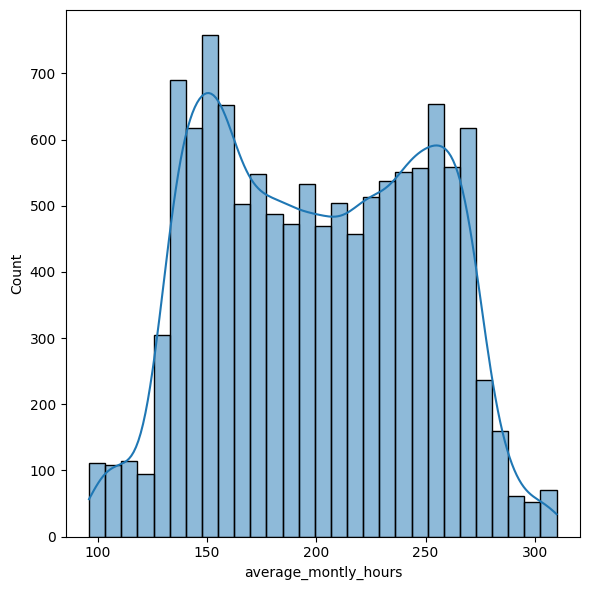

In [237]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x = df["average_montly_hours"],kde=True)
plt.tight_layout()
plt.show()

### Number of Projects

In [238]:
df["number_project"].value_counts()

,count
number_project,
4,3685
3,3520
5,2233
2,1582
6,826
7,145


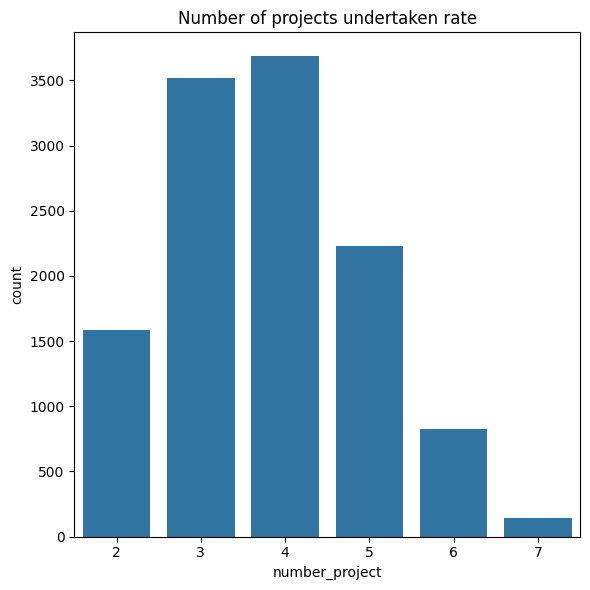

In [239]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df["number_project"])
plt.title("Number of projects undertaken rate")
plt.tight_layout()
plt.show()

### Promotion made in last 5 years

In [240]:
df["promotion_last_5years"].value_counts()

,count
promotion_last_5years,
0,11788
1,203


In [241]:
labels = df["promotion_last_5years"].value_counts().index.tolist()
labels

[0, 1]

In [242]:
labels = ["Prmoted" if i==1 else "Not promoted" for i in labels]
labels

['Not promoted', 'Prmoted']

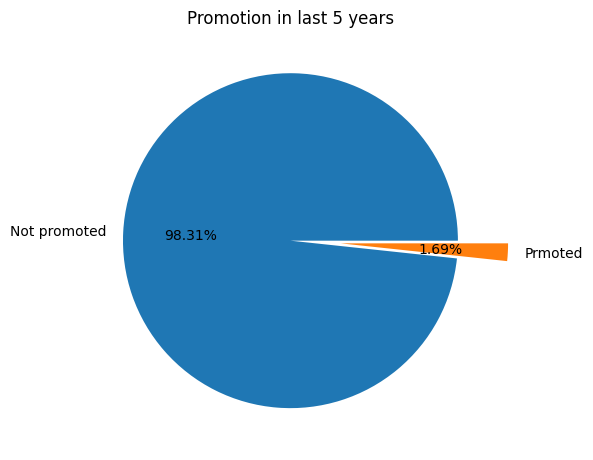

In [243]:
plt.figure(figsize=(6,6))
plt.pie(df["promotion_last_5years"].value_counts(),labels=labels,autopct="%1.2f%%", explode = [0, 0.3])
plt.title("Promotion in last 5 years")
plt.tight_layout()
plt.show()

### Work Accidents

In [244]:
df["Work_accident"].value_counts()

,count
Work_accident,
0,10141
1,1850


In [245]:
labels = df["Work_accident"].value_counts().index.tolist()
labels

[0, 1]

In [246]:
labels = ["Work Accident" if i==1 else "No Work Accident" for i in labels]
labels

['No Work Accident', 'Work Accident']

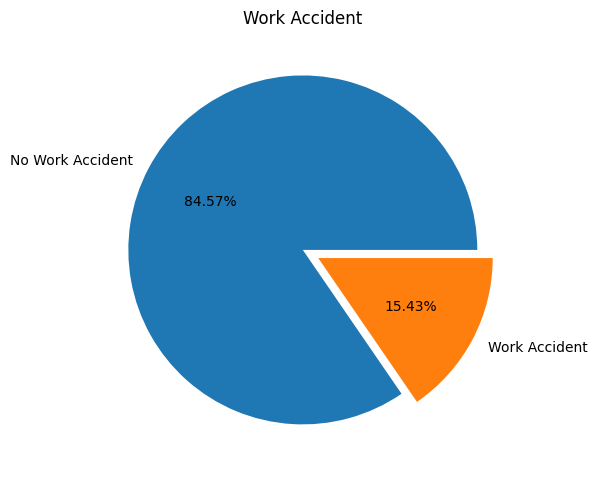

In [247]:
plt.figure(figsize=(6,6))
plt.pie(df["Work_accident"].value_counts(),labels=labels,autopct="%1.2f%%", explode = [0, 0.1])
plt.title("Work Accident")
plt.tight_layout()
plt.show()

### Time Spent in Company

In [248]:
df["time_spend_company"].value_counts()

,count
time_spend_company,
3,5190
2,2910
4,2005
5,1062
6,542
10,107
7,94
8,81


In [249]:
labels = df["time_spend_company"].value_counts().index.tolist()
labels

[3, 2, 4, 5, 6, 10, 7, 8]

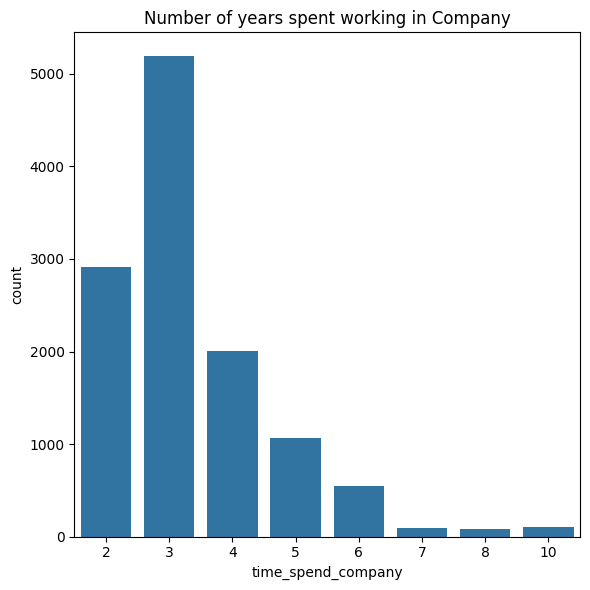

In [250]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df["time_spend_company"])
plt.title("Number of years spent working in Company")
plt.tight_layout()
plt.show()

In [251]:
df["time_spend_company"].mean()

3.3648569760653824

### Department Comparison

In [252]:
df["sales"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [253]:
df["sales"].value_counts()

,count
sales,
sales,3239
technical,2244
support,1821
IT,976
RandD,694
product_mng,686
marketing,673
accounting,621
hr,601


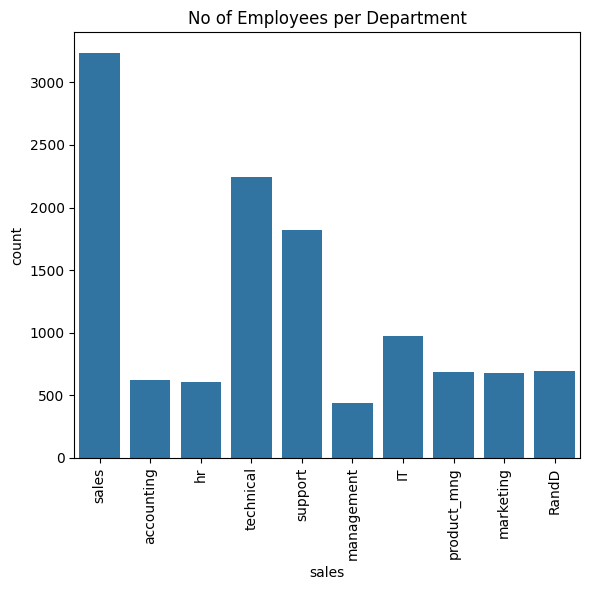

In [254]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df["sales"])
plt.title("No of Employees per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [255]:
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [256]:
df["salary"].value_counts()

,count
salary,
low,5740
medium,5261
high,990


In [257]:
labels = df["salary"].value_counts().index.tolist()
labels

['low', 'medium', 'high']

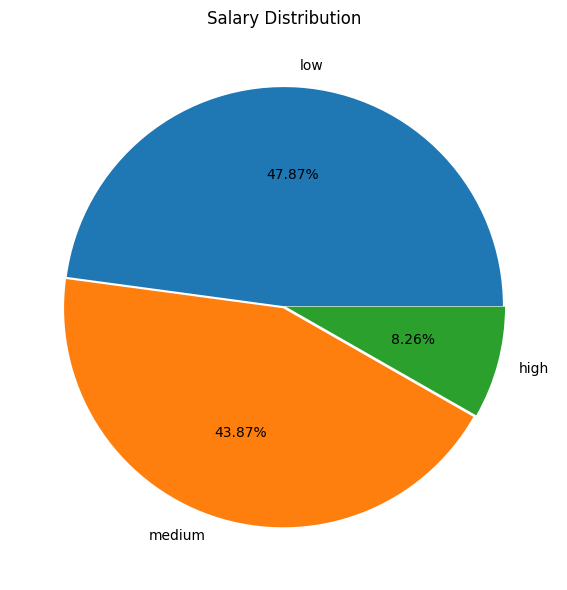

In [258]:
plt.figure(figsize=(6,6))
plt.pie(df["salary"].value_counts(),labels=labels,autopct="%1.2f%%", explode = [0, 0.01,0.01])
plt.title("Salary Distribution")
plt.tight_layout()
plt.show()

## Data Preprocessing

In [259]:
df.rename(columns={"sales":"department", "salary": "salary_level"},inplace=True)

In [260]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary_level'],
      dtype='object')

### Categorical Encoding

In [261]:
categorical_cols = ["department","salary_level"]
encoded_cols = pd.get_dummies(df[categorical_cols], prefix="cat").astype(int)

In [262]:
encoded_cols

,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,0,0,1,0,0,0,0,0,1,0,0
11996,0,0,0,0,1,0,0,0,0,0,1,0,0
11997,0,0,0,0,1,0,0,0,0,0,1,0,0
11998,0,0,0,0,0,1,0,0,0,0,1,0,0


In [263]:
df = df.join(encoded_cols)

In [264]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary_level,...,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [265]:
df.drop(["department","salary_level"], inplace=True, axis="columns")

In [266]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'cat_IT', 'cat_RandD', 'cat_accounting',
       'cat_hr', 'cat_management', 'cat_marketing', 'cat_product_mng',
       'cat_sales', 'cat_support', 'cat_technical', 'cat_high', 'cat_low',
       'cat_medium'],
      dtype='object')

### Min Max Scaling

In [267]:
df["average_montly_hours"].min()

96

In [268]:
df["average_montly_hours"].max()

310

### Split data into Train and Test

In [269]:
X = df.drop("left", axis=1)
y = df["left"]

In [270]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,cat_IT,cat_RandD,cat_accounting,cat_hr,cat_management,cat_marketing,cat_product_mng,cat_sales,cat_support,cat_technical,cat_high,cat_low,cat_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [271]:
y.head()

,left
0,1
1,1
2,1
3,1
4,1


In [273]:
from sklearn.model_selection import train_test_split

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [275]:
X_train.shape

(9592, 20)

In [276]:
X_test.shape

(2399, 20)

##  Train Model

### Logistic Regression Model

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [278]:
logReg = LogisticRegression(max_iter=2000)
logReg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [279]:
logReg_pred = logReg.predict(X_test)

In [280]:
accuracy_score(y_test, logReg_pred)

0.8382659441433931

In [282]:
print(classification_report(y_test, logReg_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1999
           1       0.53      0.23      0.32       400

    accuracy                           0.84      2399
   macro avg       0.70      0.59      0.61      2399
weighted avg       0.81      0.84      0.81      2399



In [283]:
cm = confusion_matrix(y_test, logReg_pred)
cm

array([[1919,   80],
       [ 308,   92]])

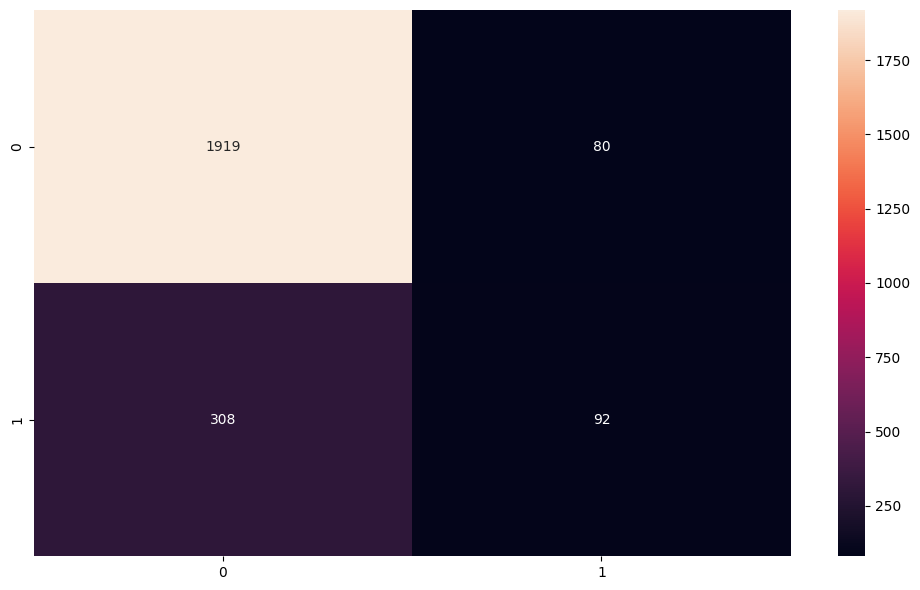

In [284]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.tight_layout()
plt.show()

### Random Forest

In [285]:
from sklearn.ensemble import RandomForestClassifier

In [286]:
ranForest =  RandomForestClassifier(n_estimators=100)
ranForest.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
ranForest_pred = ranForest.predict(X_test)

In [288]:
accuracy_score(y_test, ranForest_pred)

0.9837432263443101

In [290]:
print(classification_report(y_test, ranForest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1999
           1       0.99      0.91      0.95       400

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



In [291]:
cm = confusion_matrix(y_test, ranForest_pred)
cm

array([[1995,    4],
       [  35,  365]])

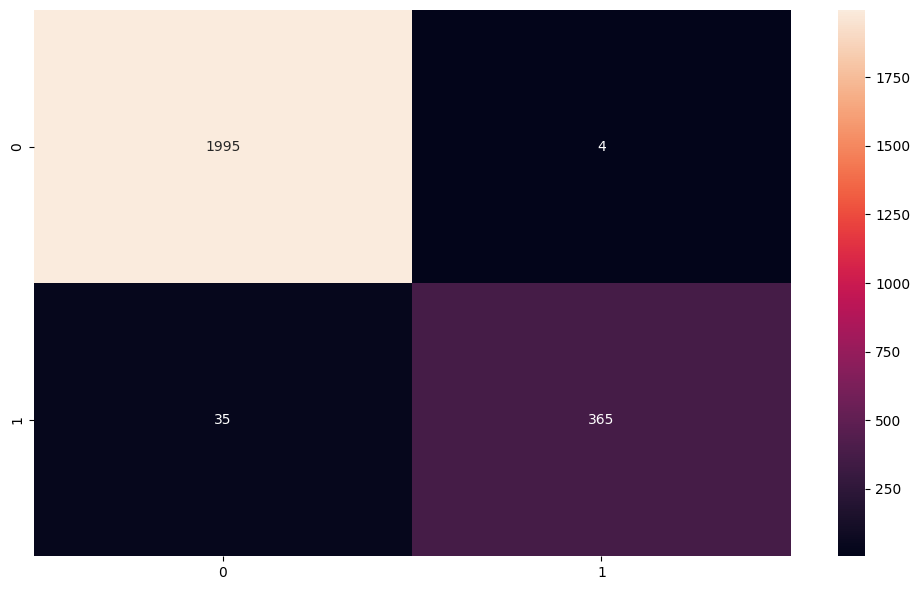

In [293]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.tight_layout()
plt.show()

## Hyper-parameter Tunning

In [294]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [302]:
parameter = {
    'criterion' : ['gini', 'entropy'],
    "n_estimators": [10,100,150,200],
    "min_samples_leaf": [1,2,4,6],
    "max_features": ["auto", "sqrt", "log2"]
}

In [303]:
kfold = StratifiedKFold(n_splits=5)

In [304]:
clf = GridSearchCV(ranForest, parameter, scoring = "accuracy", n_jobs=2, cv=kfold)

In [305]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [10, 100, 150, 200]},
             scoring='accuracy')

In [306]:
clf.get_params()

{'cv': StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': 2,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'n_estimators': [10, 100, 150, 200],
  'min_samples_leaf': [1, 2, 4, 6],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': Tru

In [307]:
clf.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [309]:
clf.best_score_

0.982173001340527

In [310]:
clf.score(X_test, y_test)

0.984160066694456

### Save Model

In [311]:
import pickle

In [312]:
with open("model.pkl", "wb") as model_file:
  pickle.dump(clf, model_file)